In [1]:
import pandas as pd
import numpy as np

In [7]:
automobile = pd.read_csv("C:/Users/theop/prakerja250523/Tugas Akhir/Data/Automobile_data.txt")

In [8]:
automobile.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [9]:
automobile.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [10]:
automobile['normalized-losses'].loc[automobile['normalized-losses'] == '?'].count()

41

In [11]:
nl = automobile['normalized-losses'].loc[automobile['normalized-losses'] != '?']
nlmean = nl.astype(str).astype(int).mean()
automobile['normalized-losses'] = automobile['normalized-losses'].replace('?',nlmean).astype(int)
automobile['normalized-losses'].head()

0    122
1    122
2    122
3    164
4    164
Name: normalized-losses, dtype: int32

In [12]:
automobile['price'].str.isnumeric().value_counts()

True     201
False      4
Name: price, dtype: int64

In [13]:
automobile['price'].loc[automobile['price'].str.isnumeric() == False]

9      ?
44     ?
45     ?
129    ?
Name: price, dtype: object

In [14]:
price = automobile['price'].loc[automobile['price'] != '?']
pmean = price.astype(str).astype(int).mean()
automobile['price'] = automobile['price'].replace('?',pmean).astype(int)
automobile['price'].head()

0    13495
1    16500
2    16500
3    13950
4    17450
Name: price, dtype: int32

In [15]:
automobile['horsepower'].str.isnumeric().value_counts()
horsepower = automobile['horsepower'].loc[automobile['horsepower'] != '?']
hpmean = horsepower.astype(str).astype(int).mean()
automobile['horsepower'] = automobile['horsepower'].replace('?',pmean).astype(int)

In [16]:
automobile.loc[automobile['horsepower'] > 10000]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
130,0,122,renault,gas,std,four,wagon,fwd,front,96.1,...,132,mpfi,3.46,3.90,8.7,13207,?,23,31,9295
131,2,122,renault,gas,std,two,hatchback,fwd,front,96.1,...,132,mpfi,3.46,3.90,8.7,13207,?,23,31,9895


In [17]:
automobile[np.abs(automobile.horsepower-automobile.horsepower.mean())<=(3*automobile.horsepower.std())]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [18]:
automobile['bore'].loc[automobile['bore'] == '?']

55    ?
56    ?
57    ?
58    ?
Name: bore, dtype: object

In [19]:
automobile['bore'] = pd.to_numeric(automobile['bore'],errors='coerce')
automobile.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke                object
compression-ratio    float64
horsepower             int32
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                  int32
dtype: object

In [20]:
automobile['stroke'] = pd.to_numeric(automobile['stroke'],errors='coerce')
automobile.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int32
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                  int32
dtype: object

In [21]:
automobile['peak-rpm'] = pd.to_numeric(automobile['peak-rpm'],errors='coerce')
automobile.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int32
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                  int32
dtype: object

In [22]:
automobile['num-of-doors'].loc[automobile['num-of-doors'] == '?']
automobile = automobile[automobile['num-of-doors'] != '?']
automobile['num-of-doors'].loc[automobile['num-of-doors'] == '?']

Series([], Name: num-of-doors, dtype: object)

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

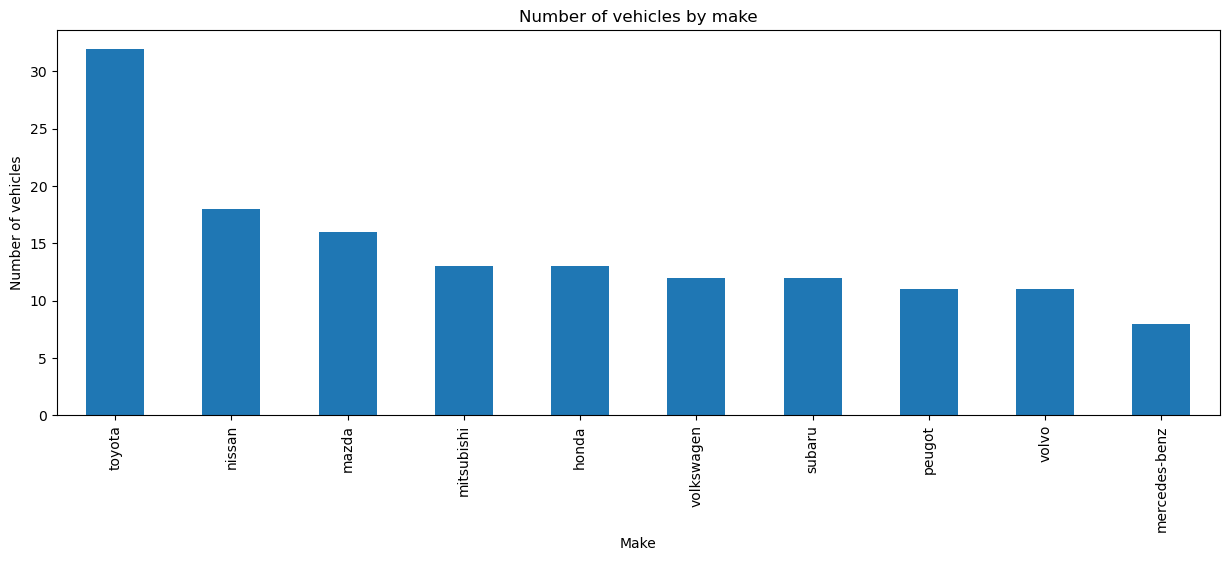

In [27]:
automobile.make.value_counts().nlargest(10).plot(kind='bar', figsize=(15,5))
plt.title("Number of vehicles by make")
plt.ylabel('Number of vehicles')
plt.xlabel('Make');

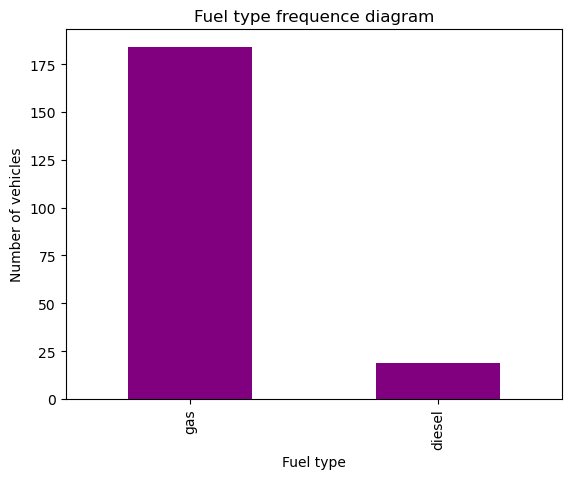

In [28]:
automobile['fuel-type'].value_counts().plot(kind='bar',color='purple')
plt.title("Fuel type frequence diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('Fuel type');

        make  horsepower
129  porsche       288.0
49    jaguar       262.0
128  porsche       207.0
127  porsche       207.0
126  porsche       207.0


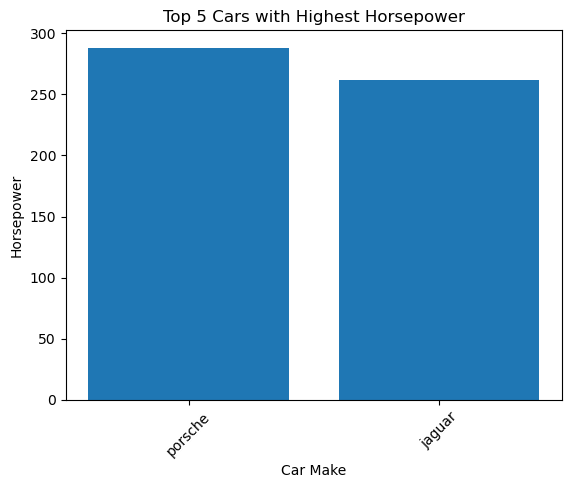

In [51]:
data = pd.read_csv("C:/Users/theop/prakerja250523/Tugas Akhir/Data/Automobile_data.txt")
data['horsepower'] = data['horsepower'].replace('?', np.nan)
data['horsepower'] = pd.to_numeric(data['horsepower'])
sorted_data = data.sort_values("horsepower", ascending=False)
top_5_cars = sorted_data.head(5)
print(top_5_cars[['make', 'horsepower']])
plt.bar(top_5_cars['make'], top_5_cars['horsepower'])
plt.xlabel('Car Make')
plt.ylabel('Horsepower')
plt.title('Top 5 Cars with Highest Horsepower')
plt.xticks(rotation=45)
plt.show()

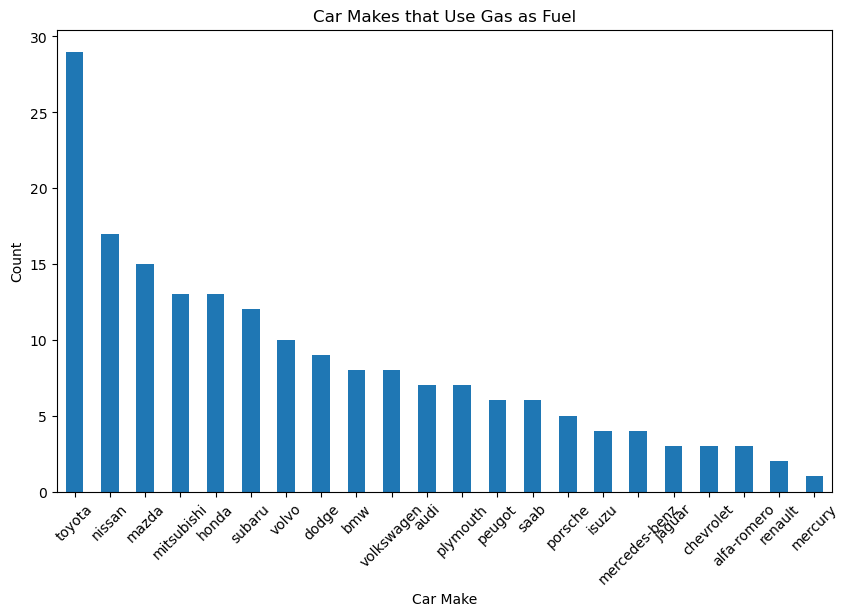

In [53]:
gas_cars = data[data['fuel-type'] == 'gas']
car_counts = gas_cars['make'].value_counts()
plt.figure(figsize=(10, 6))
car_counts.plot(kind='bar')
plt.title('Car Makes that Use Gas as Fuel')
plt.xlabel('Car Make')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

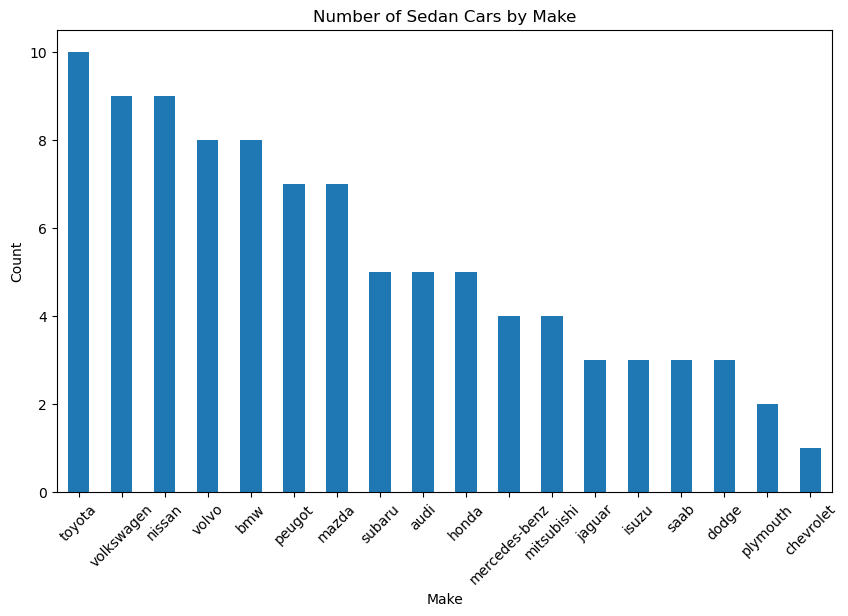

In [54]:
sedan_cars = data[data['body-style'] == 'sedan']
sedan_counts = sedan_cars['make'].value_counts()
plt.figure(figsize=(10, 6))
sedan_counts.plot(kind='bar')
plt.title('Number of Sedan Cars by Make')
plt.xlabel('Make')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [55]:
file_path = 'C:/Users/theop/prakerja250523/Tugas Akhir/Data/Automobile.csv'
automobile.to_csv(file_path, index=False)
automobile.to_csv('Automobile.csv')